In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [60]:
data_2006 = pd.read_csv('2006.csv')

In [61]:
data_2006.head()

,year,month,day,hour,minute,20min,date,datetime_hour,datetime_30,datetime_20,datetime_10,maxdry,maxhum,maxbaro,1hour,30mins,20mins,10mins
0,2006,1,1,0,0,0,01/01/2006 00:00,2006110,20061100,20061100,20061100,6.2,89.5,990.5,0,0,0,0
1,2006,1,1,0,10,0,01/01/2006 00:10,2006110,20061100,20061100,200611010,6.4,89.5,990.6,0,0,0,0
2,2006,1,1,0,20,20,01/01/2006 00:20,2006110,20061100,200611020,200611020,6.6,88.6,990.9,0,0,0,0
3,2006,1,1,0,30,20,01/01/2006 00:30,2006110,200611030,200611020,200611030,6.8,87.6,991.1,0,0,0,0
4,2006,1,1,0,40,40,01/01/2006 00:40,2006110,200611030,200611040,200611040,6.7,87.1,991.4,0,0,0,0


In [62]:
#10min XGBOOST model

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

#remove the columns that are not needed, only maxdry, maxhum, maxbaro, 1hour needed
X = data_2006.drop(['year', 'month', 'day', 'hour', 'minute', '20min', 'date', 'datetime_hour', 'datetime_30', 'datetime_20', 'datetime_10'], axis=1)

In [63]:
X.head()

,maxdry,maxhum,maxbaro,1hour,30mins,20mins,10mins
0,6.2,89.5,990.5,0,0,0,0
1,6.4,89.5,990.6,0,0,0,0
2,6.6,88.6,990.9,0,0,0,0
3,6.8,87.6,991.1,0,0,0,0
4,6.7,87.1,991.4,0,0,0,0


In [64]:
X_lightning = X[X['10mins'] == 1]
X_no_lightning = X[X['10mins'] == 0]

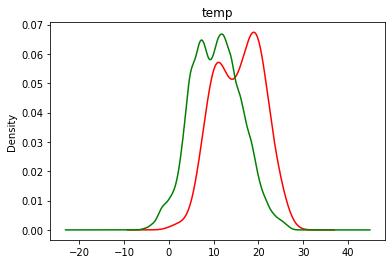

In [65]:
# plotting the density plot 
# for 'max_dry' attribute
# using plot.density()
X_lightning.maxdry.plot.density(color='red')
X_no_lightning.maxdry.plot.density(color='green')
plt.title('temp')
plt.show()

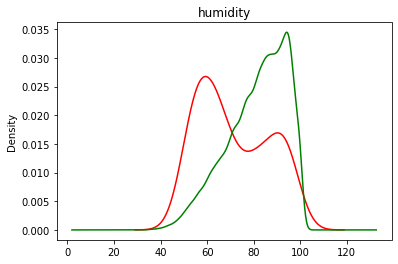

In [66]:
#maxhum
X_lightning.maxhum.plot.density(color='red')
X_no_lightning.maxhum.plot.density(color='green')
plt.title('humidity')
plt.show()

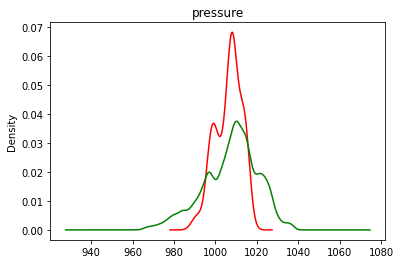

In [67]:
#maxbaro
X_lightning.maxbaro.plot.density(color='red')
X_no_lightning.maxbaro.plot.density(color='green')
plt.title('pressure')
plt.show()

In [68]:
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
X['10mins'].value_counts()
inactive = len(X[X['10mins'] == 0])
active = len(X[X['10mins'] == 1])
class_distribution_ratio = inactive/active
class_distribution_ratio

504.38461538461536

In [71]:
X_train = X.drop('10mins', axis=1)
y_train = X['10mins']
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=0, train_size = .25)


In [72]:
from imblearn.under_sampling import NearMiss
undersampling = NearMiss(version = 3, n_neighbors = 3)
from collections import Counter
#transform the dataset
X, Y = undersampling.fit_resample(X_train,y_train)
counter = Counter(Y)
print(counter)

Counter({0: 25, 1: 25})


In [73]:
#oversample
from imblearn.over_sampling import SMOTE
#transform the dataset
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)
counter = Counter(Y)
print(counter)

Counter({0: 25, 1: 25})


In [74]:
Y

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: 10mins, dtype: int64

In [75]:
Y.value_counts()
inactive = len(Y == 0)
active = len(Y == 1)
class_distribution_ratio = inactive/active
print(class_distribution_ratio)
print(inactive)
print(active)

1.0
50
50


In [77]:
X.drop(['30mins', '20mins', '1hour'] , axis=1, inplace=True)

In [78]:
X

,maxdry,maxhum,maxbaro
0,11.2,78.5,1013.8
1,10.4,78.6,1014.1
2,10.6,79.7,1014.3
3,18.4,77.0,996.5
4,19.1,78.1,999.7
5,21.4,58.4,998.8
6,25.2,64.3,1008.3
7,20.3,57.9,999.6
8,18.3,75.4,998.3
9,20.3,57.9,999.8


In [83]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X, Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [85]:
X_valid.drop(['30mins', '20mins', '1hour'] , axis=1, inplace=True)

In [86]:
my_model = XGBRegressor()
my_model.fit(X, Y, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [87]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
# Various hyper-parameters to tune
#Add more
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [88]:
xgb_grid.fit(X,
         Y)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[14:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "silent" } are not used.

0.0
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [89]:
#results
#tp = true positive, fp = false positive, tn = true negative, fn = false negative

from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix

#confusion matrix

from sklearn.metrics import confusion_matrix

predictions = my_model.predict(X_valid)
predictions = [round(value) for value in predictions]
print(predictions)

print(confusion_matrix(y_valid, predictions))


[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 

In [90]:
print(confusion_matrix(y_valid, predictions))


[[17111 22230]
 [   24    55]]


In [91]:
#f-score
from sklearn.metrics import f1_score
f1_score(y_valid, predictions, average='binary')


0.00491861920944375